In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/kaggle/input/amazonebook/datafinal.csv", index_col = 0)

In [3]:
data.head()

,000100039X,0001055178,0001473123,0001473727,0001473905,0001712772,000171287X,0001714538,0002005395,0002006715,...,B00LZ19FE0,B00LZ4D0UC,B00LZ5SRTK,B00LZ83VIO,B00LZ9OBWI,B00LZFHL7Y,B00LZKMXBI,B00M029T4O,B00M0RE7CS,B00M13FNSS
overall,,,,,,,,,,,,,,,,,,,,,
1.0,6,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,4,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3.0,8,2.0,0.0,0.0,1.0,0.0,2.0,0.0,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0
4.0,15,10.0,2.0,0.0,0.0,1.0,1.0,2.0,3.0,0.0,...,3.0,5.0,1.0,0.0,0.0,2.0,14.0,1.0,1.0,1.0
5.0,173,2.0,13.0,7.0,5.0,13.0,9.0,3.0,6.0,4.0,...,21.0,60.0,4.0,5.0,7.0,13.0,141.0,12.0,29.0,6.0


Filtrons la base de données de facon que le nombre de livre est supérieur à 1000 et le nombre de rating est supérieur à 2000.
Dans le TP1 nous avons tenu compte de l'ensemble de rating, il s'agit maintenant de filtrer la base de données pour que le nombre de livres soit supérieur à 1000.

In [4]:
data = data.transpose()

In [5]:
data = data.replace(0, np.nan)

In [6]:
df_1 = data[data.isna().sum(axis = 1) <= 1]

In [7]:
from sklearn.model_selection import train_test_split
data, rest = train_test_split(df_1, train_size = 2000)


<AxesSubplot:xlabel='overall'>

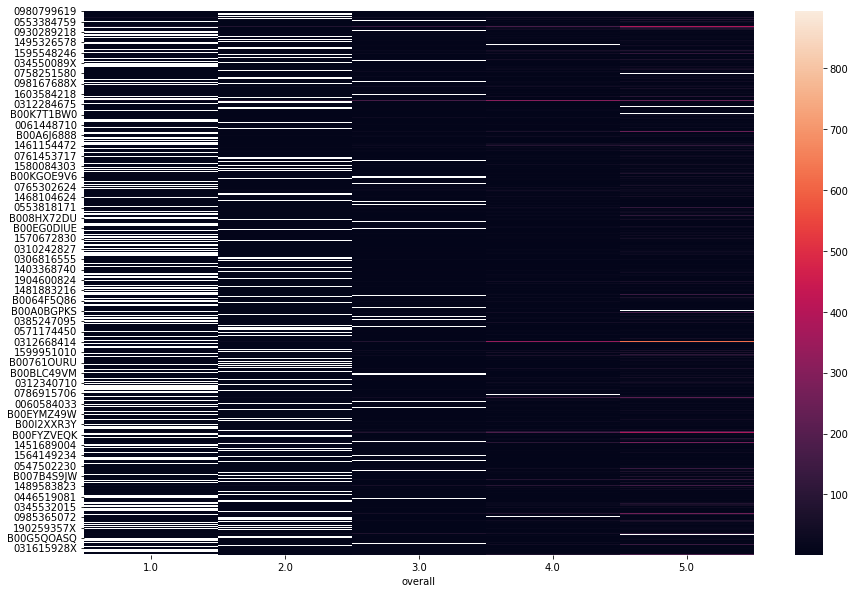

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(data)

In [9]:
from random import randint
def DataSelection(data):
    for col in range(0,data.shape[0]):
        for i in range(0,randint(0,1)):
            index = randint(0,4)
            if data.iloc[col,index] == np.nan :
                pass
            else:
                data.iloc[col,index] = np.nan
    return data

In [10]:
df1 = DataSelection(data)
df2 = DataSelection(data)
df3 = DataSelection(data)

calculons la matrice de similitude 

<AxesSubplot:xlabel='overall', ylabel='overall'>

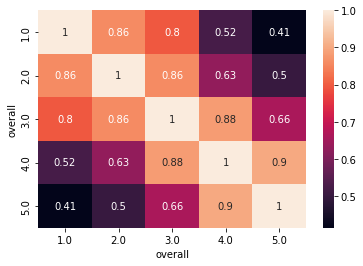

In [11]:
sns.heatmap(df2.corr(method ='pearson'), annot = True)

In [12]:
df_2 = df2.transpose()

In [13]:
df2_corr = df_2.corr(method ='pearson')

Extraire les ensembles des livres les plus similaires

In [14]:
from sklearn.preprocessing import StandardScaler
df2_corr = df2_corr.replace(np.nan,0)
df2_scale = StandardScaler().fit_transform(df2_corr)

In [15]:
from sklearn.cluster import KMeans
kmeans_1 = KMeans(n_clusters = 3)
kmeans_1.fit(df2_scale)
y_1 = kmeans_1.labels_

In [16]:
from sklearn.decomposition import PCA
mypca_1 = PCA(n_components=2)
pca_1 = mypca_1.fit_transform(df2_scale)

In [17]:
pca_df_eucl = pd.DataFrame({
    "Dim1" : pca_1[:, 0],
    "Dim2" : pca_1[:, 1],
    "Target" : y_1
})

<AxesSubplot:xlabel='Dim1', ylabel='Dim2'>

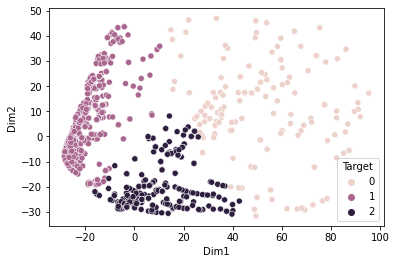

In [18]:
sns.scatterplot(data = pca_df_eucl, x = "Dim1", y = "Dim2", hue = 'Target')

#### __Question iii__ : 

In [19]:
kmeans_2 = KMeans(n_clusters = 8)
kmeans_2.fit(df2_scale)
y_2 = kmeans_2.labels_

In [20]:
mypca_2 = PCA(n_components=2)
pca_2 = mypca_2.fit_transform(df2_scale)

In [21]:
pca_df_eucl = pd.DataFrame({
    "Dim1" : pca_2[:, 0],
    "Dim2" : pca_2[:, 1],
    "Target" : y_2
})

<AxesSubplot:xlabel='Dim1', ylabel='Dim2'>

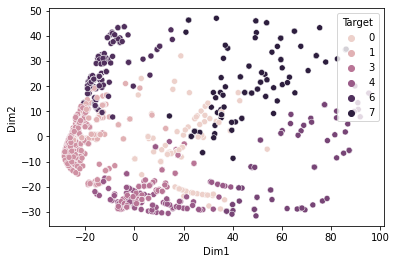

In [22]:
sns.scatterplot(data = pca_df_eucl, x = "Dim1", y = "Dim2", hue = 'Target')